# Neural network, Keras & Tensorflow

## Curriculum vitae

### Achtergrond


Tom Eversdijk  
Opleiding: Burgerlijk ingenieur computerwetenschappen - Artificiele intelligentie @KULeuven, 2019

### Projecten

#### Thesis: Intelligence trafficlights
Ontwerpen van een systeem voor intelligente verkeerslichten dat de verkeersdoorstroming optimaliseert. Het doel was om te zorgen voor globale optimalisatie door rekening te houden met naburige kruispunten.

NN: 
* input: wachttijd & aantal wachtende voertuigen per rijstrook voor een kruispunt [numeric] .
* Output: Combinatie van verkeerslichten die gelijktijdig op groen gezet worden [0:1].
* type: Deep neural network & Q-learning

#### Machine learning project: Dots & Boxes machine learning
Ontwerpen van een AI die het spel [Dots & Boxes](https://nl.wikipedia.org/wiki/Kamertje_verhuren_(spel)) kan spelen.  

NN:
* input: Representatie van het speelbord [boolean]
* output: Score voor bepaalde zet
* Type: Deep Convolutional neural network getrained door self-play

#### KULeuven DTAI: Connect 4 demo
Bedenken, ontwerpen en ontwikkelen van een interactieve AI-demo ter promotie van departement computerwetenschappen specialisatie AI. Dit is gebeurd door een AI die het spel 4-op-een-rij kan spelen waarbij gebruikers de redenering van de AI kunnen bekijken en verschillende parameters kunnen instellen. Hier is gebruik gemaakt van Monte Carlo Tree Search (MCTS) & Deep Convolutional Neural

Bevat een value & policy network, gelijkaardig aan [Alpha-Go](https://deepmind.com/research/case-studies/alphago-the-story-so-far)  

Policy NN:
* input: Representatie van het speelbord [-1;0;1]
* output: Scores per mogelijk zet 
* Type: Deep Convolutional neural network getrained door self-play

Value NN
* input: Representatie van het speelbord [-1;0;1]
* output: Waarschijnlijkheid van wins in de huidige situatie
* Type: Deep Convolutional neural network getrained door MCTS plays

## Neural network

### Wat is een neuraal network?
Een NN (Neural network) mapt N dimensionale input naar M dimensionale output en gaat hierbij zelf op zoek naar hoe de mapping exact moet gebeuren. Het is een optimalisatieprobleem waarbij er een optimalisatie gebeurd om de fout zo klein mogelijk te maken.

Onderstaande afbeelding is een neuraal netwerk met 3 inputs & 1 output knoop.  
De input bestaat uit een lijst van cijfers en ook de output is een een lisjt van cijfers. De ontwerper van het neuraal netwerk zal dus altijd zelf zijn probleem moeten vertalen naar een rij cijfers en ook van de output cijfers terug naar het probleem. 
![alt text](img/NN1.png)
Naast de input & output is er ook een hidden layer in het netwerk te zien. Deze hidden layer kan beschouwd worden als een tussenresultaat.  


De waarde van een hidden layer knoop wordt bepaald door een lineaire combinatie te maken van al de waardes uit de vorige layer, voorgesteld door de oranje pijlen in de figuur. Deze lineaire combinatie zijn de gewichten van het netwerk en worden geinitialiseerd met random waardes. Naast de lineaire combinatie is er ook altijd een activatie-functie per knoop. Dit is een niet lineaire functie die van belang is omdat  hidden layers anders wiskundig gezien geen meerwaarde bieden, de lineaire combinaties van verschillende layers na elkaar zonder activatie-functie kunnen anders namelijk vereenvoudigd worden tot 1 lineaire combinatie. Het trainen van een neuraal netwerk is niets anders dan het aanpassen van de gewichten van de lineaire combinatie om een nauwkeuriger antwoord te bekomen.

Lineaire combinatie waarbij a<sub>i</sub> het gewicht is en u<sub>i</sub> de waarde uit de vorige layer.
![alt text](img/lineaire_combinatie.svg)

Een veel gebruikte activatie-functie is ReLu:
![alt text](img/Relu.png)

### Trainen van een neuraal netwerk
Het trainen van een neuraal netwerk is niets anders dan het zoeken van goede gewichten voor de eerder besproken lineaire combinaties. Er bestaan verschillende manieren om dit te doen maar de meest voorkomende is gradient descent die hier iets zal worden toegelicht.

#### Gradient descent
Het trainen van een neuraal netwerk gebeurd door het netwerk veel voorbeelden te geven waar het resultaat van gekent is. De input van een gekend voorbeeld wordt via de input knopen, door verschillende lineaire combinaties uiteindelijk bij de uitput knoop terecht. Initieel zal de output knoop een willekeurig resultaat geven en kan dit gegeven resultaat (ŷ) vergeleken worden met het gewenste resultaat (y). We willen dit verschil minimaliseren.

##### Loss-functie:
Het vergelijken van het gewenste resultaat met het bekomen resultaat wordt ook wel de loss of error genoemd. Er zijn verschillende manieren om deze vergelijking te doen en deze hebben hun eigen impact op het resultaat. Zo zal een mean square loss __(ŷ - y)<sup>2</sup>__ het belangrijker vinden om outliers correct te labelen in vergelijking met een mean absolute loss __(ŷ - y)__. 

Neem bijvoorbeeld onderstaande tabellen, we zien dat table 2 een outlier van 15 heeft wat zorgt voor een groot verschil in loss. Een hoge loss betekend dat de dat de gewichten in het netwerk een grotere aanpassing zullen ondergaan om de fout te verkleinen.

<table>
<tr> <th> Table 1 </th> <th> Table 2 </th> </tr>
    
<tr><td>
    
| Error | abs(error)  | error<sup>2</sup>  | 
| :----:|:-----------:| :-----------------:|
| 1     |  1          | 1                  |
| -2    |  2          | 2                  |
| -0.5  | 0.5         | 0.25               |
| 1.5   | 1.5         | 2.25               |
    
    Mean square loss: 1
    Mean absolute loss: 1.22

</td><td>

| Error | abs(error)  | error<sup>2</sup>  |
| :----:| :----------:| :-----------------:|
|   1   | 1           | 1                  |
|  -2   | 2           | 4                  | 
|  -0.5 | 0.5         | 0.25               |
|  15   | 15          | 225                |

    Mean square loss: 3.8
    Mean absolute loss: 6.79
</td></tr>
</table>

##### [Backpropagation](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
_Dit is wiskundig het ingewikkeldste deel, bekijk de link onder de titel voor een uitgewerkt voorbeeld_  

Eens we een loss hebben berekend kunnen we de gewichten gaan aanpassen door middel van backpropagation. We willen weten hoeveel de output veranderd als we een bepaald gewicht veranderen. Vertalen we dit wiskundig komt dit overeen met het nemen van de afgeleiden van de error naar het gewicht. Met de kettingregel kunnen we dit vereenvoudigen naar 3 eenvoudigere afgeleiden. Namelijk de afgeleiden van de loss naar predictie, de afgeleiden van de predictie naar de input (voor de activatiefunctie) en de afgeleiden van de input naar het gewicht. Berekenen we deze 3 eenvoudigere afgeleiden weten we wat de invloed van een verandering van het gewicht zal doen op het resultaat. We weten echter nog niet exact hoe groot deze verandering zal moeten zijn. Daarom vermeningvuldigen we dit ook met een learning rate. Het nemen van een grote learning rate zorgt er voor dat het netwerk snel zal leren maar dat het niet nauwkeurig genoeg gaat leren. Het nemen van een kleine learning rate zorgt ervoor dat het netwerk er heel lang over zal doen om iets nieuws te leren.

### kracht van een neuraal netwerk:
Het idee achter een neuraal netwerk is niet complex of vernieuwend en kan uiterst efficient gebeuren met een GPU. Net omdat het berekenen van lineaire combinaties veel onafhankelijke kleine berekeningen zijn die men in een matrix kan voorstellen om op die manier niet 1 maar X inputs gelijktijdig te bepalen. Bovendien geldt dit voor zowel  forward (predictie) als backwards (training) 

### Veel gebruikte soorten neuraal netwerk
* Neuraal netwerk: Simpel neuraal netwerk zoals bovenstaande figuur
* Deep neuraal netwerk: Een neuraal netwerk met meer dan 1 hidden layer. Voorbeeld: http://scs.ryerson.ca/~aharley/vis/fc/
* Convolutioneel neuraal netwerk: Een neuraal netwerk waardat een subset van de input gebruikt wordt voor het bepalen van een hidden layer knoop ipv al de inputs samen. Ook worden de zelfde gewichten gebruikt voor verschillende input subsets. Voorbeeld: http://scs.ryerson.ca/~aharley/vis/conv/
* RNN (Recurrent neuraal netwerk): Een neuraal netwerk waarbij de output (of tussenresultaat) gebruikt wordt in een volgende iteratie van het netwerk. Handig als er tijdsafhankelijkheid is in het netwerk
* LSTM netwerk (long-short-term-memory): Een RNN dat tijdsafhankelijkheid langer kan onthouden dan een RNN
* Auto-encoder: een deep neuraal netwerk waarbij de input en output het zelfde zijn maar waarbij een hidden layer minder knopen bevat. Na training worden de knopen vanaf deze hidden layer tot de output weggegooit om zo een dimensie reductie te bekomen. N dimensie input naar M dimensie hidden layer.
* ...

### Beperkingen
* Veel trainings-data nodig
* Veel trainings-tijd nodig
* Vaak krachtige hardware nodig voor training, predictie is dit een minder belangrijke vereisten
* altijd zelfde input grootte vereist
* vertaling van probleem naar array en terug naar probleem kan lastig zijn
* Moeilijk te beredeneren waarom een bepaalde output wordt gegeven
* Input moet beperkt blijven (niet naar oneindig gaan) omdat anders oneindige loss hebt
* Netwerk moet afleidbaar zijn
* ...

## Demo

In deze demo gaan we een neuraal netwerk trainen om handgeschreven cijfers van de mnist dataset te herkennen. We maken hier 2 verschillende netwerken voor. 1 fully connected netwerk (Deep neuraal netwerk) en 1 convolutioneel neuraal netwerk

Import dependecies:
* Numpy:
* Keras van Tensorflow
* mnist dataset: De MNIST dataset bestaat uit 28x28 greyscaled afbeeldingen van handgeschreven cijfers

In [24]:
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential, losses, optimizers, utils
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, save_model
from matplotlib import pyplot as plt
import random

We starten met te bekijken van de dataset.

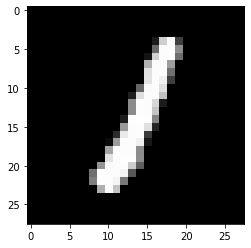

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  26. 207. 253.  63.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0. 104. 252. 252. 140.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.  19. 209. 252. 252. 110.   0.   0.   0.   0.   0.  

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def show_img(img_item):
    image = np.array(img_item, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
def show_raw(img_item):
    image = np.array(img_item, dtype='float')
    pixels = image.reshape((28, 28))
    print(pixels)
    
def get_item(x_set, y_set, index = None):
    index = random.randint(0, len(x_set) - 1) if index is None else index
    return x_set[index], y_set[index]
     
x_item, y_item = get_item(x_train, y_train, 14945)
show_img(x_item)
show_raw(x_item)

We zien dat de afbeelding bestaat uit een 28x28 rijen met pixel waardes tussen de 0 en 255. Een neuraal netwerk is erg gevoeling aan de input en het is daarom verstandig deze pixels eerst te normaliseren naar waardes tussen 0 en 1. We kunnen dit eenvoudig doen door iedere pixel te delen door zijn maximale waarde, namelijk 255.

Ook zal de shape van de input wordt aangepast, we passen dit aan zodat het kan dienen als input naar het CNN netwerk omdat er in Keras een Flatten layer bestaat die een 2D input flattend naar een 1D input. Deze 1D input kunnen we dan vervolgens gebruiken in ons DNN netwerk.

In [40]:
def prepare_X_data(x_unprepared_data):
    img_rows = x_unprepared_data.shape[1]
    img_cols = x_unprepared_data.shape[2]
    x_data = x_unprepared_data.reshape(x_unprepared_data.shape[0], img_rows, img_cols, 1)
    
    x_data = x_data.astype('float32')
    x_data /= 255
    return x_data

Naast de input bekijken we ook eventjes naar de output.
We zien dat dit 1 cijfer is, een neuraal netwerk is in staat om een regressie-probleem op te lossen maar heeft het daar vaak lastig mee. Omdat we in dit geval maar 10 exacte cijfers kunnen bekomen kunnen we dit probleem beter vertalen naar een classificatie ipv een regressie. We doen dit door one-hot-encoding toe te passen.

one-hot-encoding: Een lijst waarbij ieder element uit de lijst een 0 of een 1 kan zijn. Een 0 element betekend dat de betekenis aan dit element niet waar is, een 1 betekend dat dit wel waar is. Keras heeft hier een eenvoudige util functie voor namelijk utils.to_cateogrical/2.  
bv. Het cijfer 5 in de one-hot-encoding in ons probleem wordt weergegeven als [0,0,0,0,0,1,0,0,0,0] (zero-indexed)

In [41]:
def prepare_Y_data(y_unpreprared_data):
    y_data = utils.to_categorical(y_unpreprared_data, 10)
    return y_data

Nu dat we weten hoe we onze input en output gaan voorstellen gaan we werkelijk het neuraal netwerk maken. Zoals reeds gezegd zouden er 2 modelen gemaakt worden. Namelijk een DNN en een CNN model.  

_De input van het DNN zal ook 2 dimensionaal zijn maar zal beginnen met een Flatten layer die een 2D structuur terug 1D maakt. Dit doen we zodat we dezelfde preprocessing functie kunnen gebruiken voor ons DNN en CNN model_

We zullen 2 manieren zien om ons model te definieren.

Model 1: Deep neuraal netwerk
- Input layer: Flatten
    - Input shape: 1x28x28
- hidden layer 1: Dense
    - nodes: 512
    - Activatie functie: Relu
- hidden layer 2: Dense
    - nodes: 256
    - Activatie functie: Relu
- hidden layer 3: Dense
    - nodes: 128
    - Activatie functie: Relu
- hidden layer 4: Dense
    - nodes: 32
    - Activatie functie: Relu
- output layer: Dense
    - nodes: 10 (de 10 cijfers die te herkennen zijn, 1 output per cijfer)
    - Activatie functie: Softmax (Handig voor bepaling van waarschijnlijkheid per output)
    - optimizer: Stochastic Gradient descent (gradient descent met momentum)
    - loss: categorical crossentropy (Handig als er one-hot encoding is gebeurd voor de output)

        
Model 2: Convolutioneel neuraal netwerk
- Input layer: Conv2D
    - Input shape: 1x28x28
    - nodes: 32
    - kernel_size: 3x3 (Grootte van het convolutie raster) 
    - Activatie functie: Relu
- hidden layer 1: Conv2D
    - nodes: 64
    - kernel_size: 3x3 (Grootte van het convolutie raster) 
    - Activatie functie: Relu
- hidden layer 2: Flatten
- hidden layer 3: Dense
    - nodes: 128
    - Activatie functie: Relu
- hidden layer 4: Dense
    - nodes: 128
    - Activatie functie: Relu
- output layer: Dense
    - nodes: 10 (de 10 cijfers die te herkennen zijn, 1 output per cijfer)
    - Activatie functie: Softmax (Handig voor bepaling van waarschijnlijkheid per output)
    - optimizer: Stochastic Gradient descent (gradient descent met momentum)
    - loss: categorical crossentropy (Handig als er one-hot encoding is gebeurd voor de output)
    
    
Een convolutielaag bekijkt beschouwd niet al de input maar bekijkt een klein deel van de input. Op deze manier kan er op zoek gegaan worden naar lokale afhankelijkheden. Dit is handig bijvoorbeeld interessant bij een afbeelding aangezien de uiterst linker boven pixel en de meest rechter onder pixel weinig verband houden met elkaar. Het neuraal netwerk hier in begeleiden mbv een convolutie laag zorgt ervoor dat het netwerk sneller zal trainen. Uit onderzoek is gebleken dat een eerste convolutie laag vaak op zoek gaat naar eenvoudige patronen. (Rechte lijnen in bepaalde richtingen), een 2de laag zal deze eenvoudige patronen vaak combineren tot een iets complex patroon. (een vierkant, een cirkel,..) Verdere convolutie lagen zullen dus steeds complexere patronen kunnen herkennen.

In onderstaande afbeelding zie je hoe een convolutie te werk gaat. De grootte van de kernel is bepaald adhv de parameter, de cijfers in de kernel zijn de gewichten die door het netwerk bepaald/gezocht moeten worden. De kernel laat zien naar wat voor soort patronen er op zoek gegaan zal worden.
![text alt](img/keras_conv2d.gif)


In [42]:
input_shape = (28,28,1)
def create_model_DNN():
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer="sgd",
                  metrics=['accuracy'])
    return model

def create_model_CNN():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer="sgd",
                  metrics=['accuracy'])
    return model

model_dnn = create_model_DNN()
model_cnn = create_model_CNN()
print("Summary of DNN model")
model_dnn.summary()
print("")
print("Summary of CNN model")
model_cnn.summary()

Summary of DNN model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_____________________________

Nu dat we onze netwerken hebben gaan we deze netwerken trainen. Initeel zijn de gewichten namelijk willekeurig maar deze moeten getraind worden om een correcte voorspelleing te doen van de output. Dit kan aan de hand van de fit functie waarbij zowel X als Y waardes worden meegegeven. De batch_size parameter bepaald hoeveel voorbeelden er gelijktijdig bekeken worden. Wiskundig gezien bepaald dit de grootte van de matrix die gebruikt wordt voor de berekening. Met de epochs parameter verteld je dat het netwerk al de trainingsdata 12x moet herbekijken.

In [44]:
def train_model(model, name):
    print("start training " + str(name))
    x_prep_train = prepare_X_data(x_unprepared_data=x_train)
    y_prep_train = prepare_Y_data(y_unpreprared_data=y_train)
    model.fit(x_prep_train, y_prep_train, batch_size=128, epochs=12, verbose=1)
    print("Saving model " + str(name))
    save_model(model=model, filepath=str(name) + ".h5")
    print("Finished training model " + str(name))
    
# train_model(model_dnn, "dnn")
model_dnn = load_model("dnn.h5")
print("")
# train_model(model_cnn, "cnn")
model_cnn = load_model("cnn.h5")

Na het trainen van het netwerk is het belangrijk om te kijken of het netwerk ook goed werkt voor ongeziene voorbeelden. Het kan namelijk gebeuren dat het netwerk te vaak naar de trainingsdata kijkt met als gevolgd dat het niet goed veralgemeend.

In [45]:
def test_model(model, name):
    x_prep_test = prepare_X_data(x_unprepared_data=x_test)
    y_prep_test = prepare_Y_data(y_unpreprared_data=y_test)
    result =  model.evaluate(x_prep_test, y_prep_test, verbose=0)
    print("Model " + str(name))
    print("loss: " + str(result[0]))
    print("accuracy: " + str(result[1]))
    print("")


test_model(model_dnn, "dnn")
test_model(model_cnn, "cnn")

Model dnn
loss: 0.13984222630783916
accuracy: 0.9579

Model cnn
loss: 0.07701360287913121
accuracy: 0.9764



Tot slot bekijken we even concreet de output van het netwerk en hoe de output vertaald moet worden naar het probleem. 

Dit item zal eerst moeten worden preprocessed volgens de zelfde voorwaarden als de trainingdata zodat we dit aan het neuraal netwerk kunnen geven.

Vervolgens laten we het model een voorspelling doen en krijgen we een lijst van 10 elementen terug. De waarde van ieder element in de lijst zegt hoe waarschijnlijk dat dit cijfer het correcte antwoord is. We moeten dus op zoek gaan naar de plaats van het grootste element, dit is de voorspelling van het netwerk.

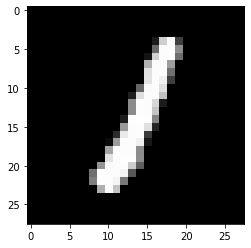

Model DNN
Prediction array: [2.7427259e-07 9.9618214e-01 2.4169944e-03 4.5651227e-04 7.0355991e-06
 1.6187087e-05 1.3758052e-04 1.5896323e-04 6.0732698e-04 1.7038357e-05]
Prediction: 1
Ground truth: 1

Model CNN
Prediction array: [1.5688279e-07 9.9964213e-01 1.1929138e-04 6.4715607e-07 6.3196040e-07
 5.8135359e-09 5.1249748e-07 9.0141912e-05 1.4625979e-04 2.2095237e-07]
Prediction: 1
Ground truth: 1



In [46]:
def predict(model, x_item, y_test = None):
    X = prepare_X_data(x_unprepared_data=np.array([x_item]))
    prediction = model.predict(X)
    print("Prediction array: " + str(prediction[0]))
    print("Prediction: " + str(np.argmax(prediction)))
    if y_test is not None:
        print("Ground truth: " + str(y_test))
        print("")
    
show_img(x_item)
print("Model DNN")
predict(model_dnn, x_item, y_item)
print("Model CNN")
predict(model_cnn, x_item, y_item)

Er is ook een methode voorzien om meerdere, eventueel random geselecteerde, items te voorspellen. Zoals te zien in de code kunnen er meerdere inputs gelijktijdig aan het netwerk worden gegeven zodat de berekening opnieuw gedaan kan worden als een matrix.

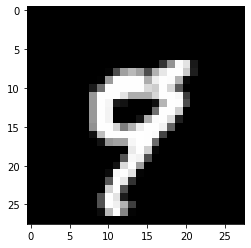

Prediction array: [1.7604547e-05 4.0810901e-06 1.6783097e-05 1.1855512e-04 2.7889939e-02
 3.2263694e-04 2.5438665e-06 9.0707161e-02 6.2763441e-04 8.8029295e-01]
Prediction: 9
Ground truth: 9



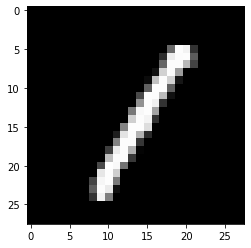

Prediction array: [5.10145277e-08 9.98164475e-01 1.71866865e-04 7.58919632e-04
 1.19777207e-04 1.06858155e-04 3.71179849e-05 4.80888411e-04
 1.21478624e-04 3.87126856e-05]
Prediction: 1
Ground truth: 1



In [10]:
def random_predict(model, nb_of_items, x, y = None):
    indexes = np.random.choice(range(len(x)), nb_of_items)
    X_items = x[indexes]
    Y_items = y[indexes]
    
    X = prepare_X_data(x_unprepared_data=np.array(X_items))
    prediction = model.predict(X)
    for i in range(nb_of_items):
        show_img(X_items[i])
        print("Prediction array: " + str(prediction[i]))
        print("Prediction: " + str(np.argmax(prediction[i])))
        if y is not None:
            print("Ground truth: " + str(Y_items[i]))
            print("")
            
random_predict(model_dnn, 2, x_test, y_test)

Tot slot zullen we nog eens een netwerk opslaan en terug opladen. We printen te summary nog een keer zodat duidelijk te zien is dat het CNN netwerk is opgeslagen. Ook kunnen we de predictie voor het opslaan en na het opslaan met elkaar vergelijken en zien we dat de resultaten exact het zelfde zijn. We zijn dus zeker dat dit over het zelfde netwerk gaat.

In [47]:
predict(model_cnn, x_item, y_item)

save_model(model=model_cnn, filepath="example.h5")
model = load_model("example.h5")
model.summary()

predict(model, x_item, y_item)

Prediction array: [1.5688279e-07 9.9964213e-01 1.1929138e-04 6.4715607e-07 6.3196040e-07
 5.8135359e-09 5.1249748e-07 9.0141912e-05 1.4625979e-04 2.2095237e-07]
Prediction: 1
Ground truth: 1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
____________________________________________________________